Introduction to neural network classification with tensorflow.
1. binary classification
2. multiclass classification
3. multilabel classification

In [ ]:
# create data to view and fit

from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x0":x[:,0], "x1":x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles["label"].value_counts()

,count
label,
1,500
0,500


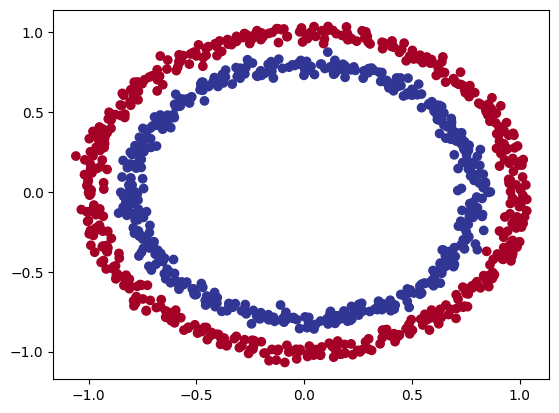

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.RdYlBu)

Input and Output shapes

In [ ]:
x.shape, y.shape  #check the shapes of features and labels

((1000, 2), (1000,))

In [ ]:
# how many samples we're working
len(x), len(y)

(1000, 1000)

In [ ]:
# view the first example of features and label
x[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

steps in modelling
1. create a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
# create a model
m1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile
m1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["accuracy"])

# fit the model
m1.fit(x, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4811 - loss: 6.8331   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4802 - loss: 6.5389 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4799 - loss: 6.4279
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5244 - loss: 5.1151
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4769 - loss: 5.9840 


In [ ]:
# lets try and improve our model by training
m1.fit(x, y, epochs=100, verbose=0)
m1.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [ ]:
tf.random.set_seed(42)
# create a model
m2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile
m2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["accuracy"])

# fit the model
m2.fit(x, y, epochs=10, verbose=0)

In [ ]:
m2.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4941 - loss: 0.6925


[0.6933222413063049, 0.4779999852180481]

In [ ]:
# improving model

tf.random.set_seed(42)
# create a model
m3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
m3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["accuracy"])

# fit the model
m3.fit(x, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5278 - loss: 3.9150
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4830 - loss: 8.3336


In [ ]:
m2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
m3.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4955 - loss: 8.1322


[8.059046745300293, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
doing binary classification


(-1.1677683182718437, 1.1360036756154805)

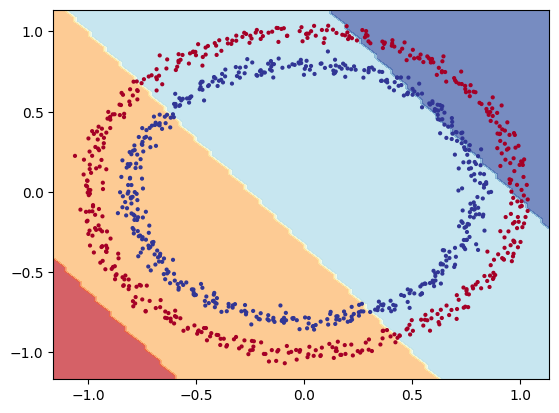

In [ ]:
import numpy as np
def plot_decision_boundary(m3, x, y):
  """
  Plots the decision boundary created by a model predicting x_test
  """

    # define the axis boundaries of the plot and create a meshgrid
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))

    # create x value
x_in = np.c_[xx.ravel(), yy.ravel()]

    # make predictions
y_pred = m3.predict(x_in)

    # check for multi-class
if len(y_pred[0]) > 1:
  print("doing multiclass classification")
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  print("doing binary classification")
  y_pred = np.round(y_pred).reshape(xx.shape)

# plotting
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(x[:, 0], x[:, 1], c=y, s=4, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

[]

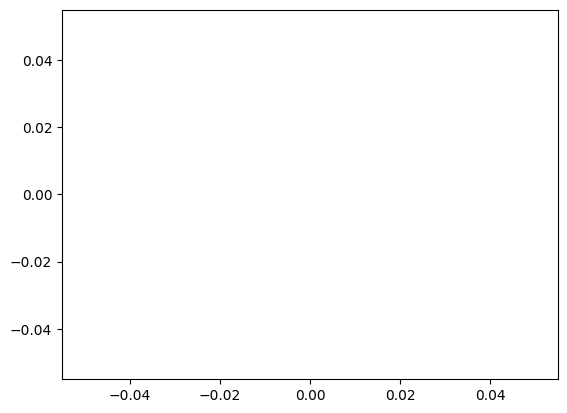

In [ ]:
plot_decision_boundary( m3,
                       x,
                       y)
plt.plot()

In [ ]:
tf.random.set_seed(42)
x_regression = tf.range(0,1000,5)
x_regression = tf.range(100,1100,5) #y =x+100

# split our regression data into training and test data
x_reg_train = x_regression[:70]
x_reg_test = x_regression[70:]
y_reg_train = x_reg_train + 100
y_reg_test = x_reg_test + 100

# fit our model to the regression data
m3.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(32,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=int32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

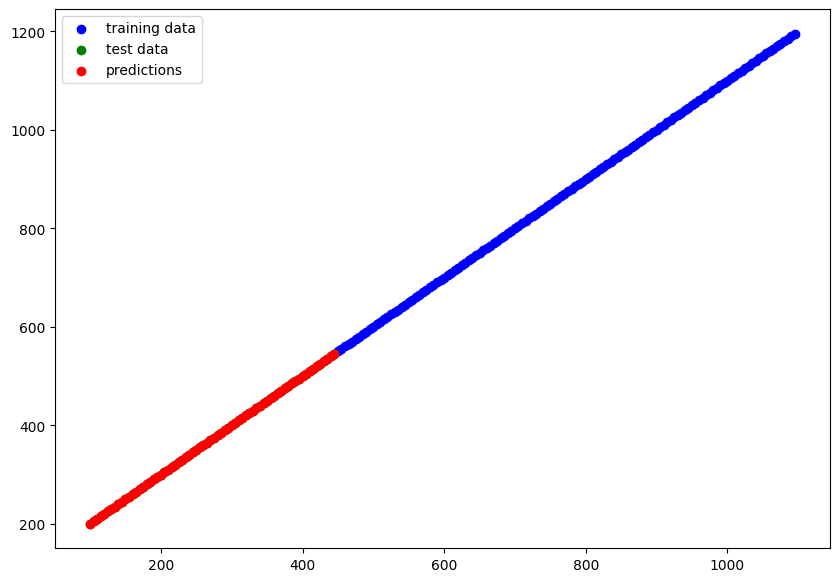

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=x_reg_test, y=y_reg_test, c="b", label="training data")
plt.scatter(x=x_reg_train, y=y_reg_train, c="g", label="test data")
plt.scatter(x=x_reg_train, y=y_reg_train, c="r", label="predictions")
plt.legend()
plt.plot(x_reg_test, m3.predict(x_reg_test))

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(32,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=int32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

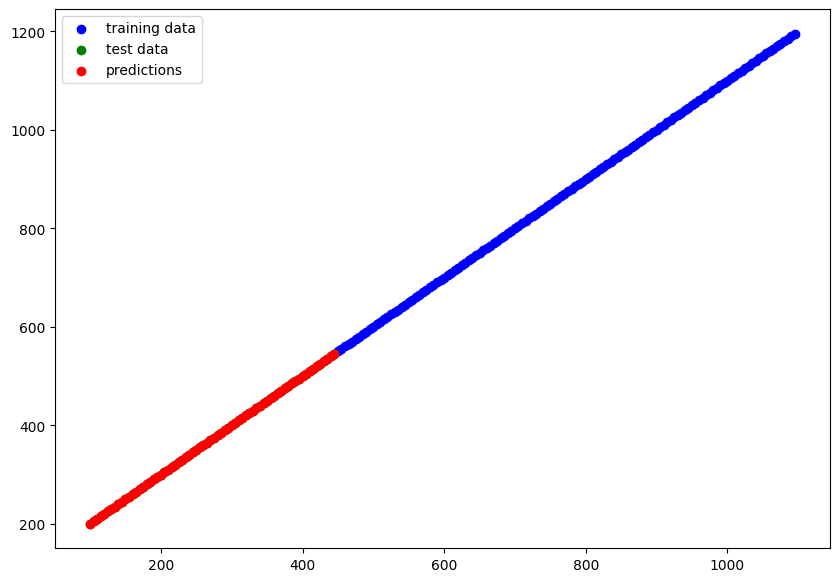

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=x_reg_test, y=y_reg_test, c="b", label="training data")
plt.scatter(x=x_reg_train, y=y_reg_train, c="g", label="test data")
plt.scatter(x=x_reg_train, y=y_reg_train, c="r", label="predictions")
plt.legend()
plt.plot(x_reg_test, m3.predict(x_reg_test))

In [ ]:
tf.random.set_seed(42)

m4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

m4.compile(loss="binary_crossentropy",
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

m4.fit(x,y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4501 - loss: 6.7313
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4531 - loss: 6.7214
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4532 - loss: 6.7171
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4532 - loss: 6.7134
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4532 - loss: 6.7100
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4532 - loss: 6.7069
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4531 - loss: 6.6989
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4515 - loss: 6.6913
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4529 - loss: 6.6397
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4527 - loss: 6.5643
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4494 - loss: 6.5506  
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

The missing piece: non-linearity

In [ ]:
tf.random.set_seed(42)

m4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

m4.compile(loss="binary_crossentropy",
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

m4.fit(x,y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4609 - loss: 6.3175   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - loss: 6.3109 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - loss: 6.3043 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4600 - loss: 6.2961 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4597 - loss: 6.2758 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4578 - loss: 6.2271 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4578 - loss: 6.2057 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4578 - loss: 6.1989 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4578 - loss: 6.1905 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4572 - loss: 6.1781
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4572 - loss: 6.1740 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

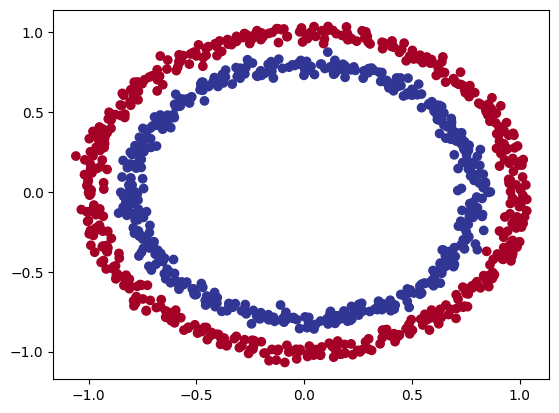

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.RdYlBu)

with non-linear activation function

In [ ]:
tf.random.set_seed(42)

m5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

m5.compile(loss=tf.keras.losses.BinaryCrossentropy,
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

history = m5.fit(x,y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4732 - loss: 6.4948   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4732 - loss: 6.4878 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4722 - loss: 6.4742 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 6.4678 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 6.4660 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 6.4656 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 6.4652 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 6.4648 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 6.4644 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 6.4430 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4684 - loss: 6.4350 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
# time to replicaate the multi-layer neural network from tensor

tf.random.set_seed(42)

m6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

m6.compile(loss="binary_crossentropy",
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

history = m6.fit(x, y, epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4901 - loss: 0.7020
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4603 - loss: 0.6999
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4679 - loss: 0.6983
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 0.6971 
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4711 - loss: 0.6961 
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4743 - loss: 0.6951
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.6942 
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4755 - loss: 0.6934
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4757 - loss: 0.6926 
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4718 - loss: 0.6919 
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4860 - loss: 0.6911 
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


(-1.1677683182718437, 1.1360036756154805)

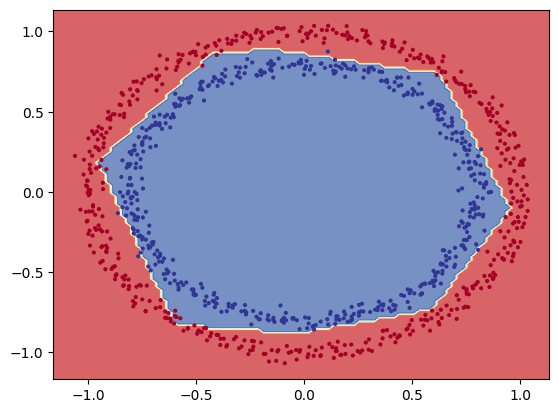

In [ ]:
import numpy as np
def plot_decision_boundary(m6, x, y):
  """
  Plots the decision boundary created by a model predicting x_test
  """

    # define the axis boundaries of the plot and create a meshgrid
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))

    # create x value
x_in = np.c_[xx.ravel(), yy.ravel()]

    # make predictions
y_pred = m6.predict(x_in)

    # check for multi-class
if len(y_pred[0]) > 1:
  print("doing multiclass classification")
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  print("doing binary classification")
  y_pred = np.round(y_pred).reshape(xx.shape)

# plotting
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(x[:, 0], x[:, 1], c=y, s=4, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
plot_decision_boundary(m6,
                       x,
                       y)

In [ ]:
tf.random.set_seed(42)

m7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

m7.compile(loss="binary_crossentropy",
           optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

history = m7.fit(x, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5116 - loss: 0.7951
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5004 - loss: 0.7601 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4947 - loss: 0.7393 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4946 - loss: 0.7269 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4939 - loss: 0.7193 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4333 - loss: 0.7146
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4752 - loss: 0.7113
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4926 - loss: 0.7090
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4894 - loss: 0.7073
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4832 - loss: 0.7060
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4788 - loss: 0.7048
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

In [ ]:
m7.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8394 - loss: 0.4207  


[0.4136258065700531, 0.8519999980926514]

In [ ]:
m7.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

In [ ]:
# plot_decision_boundary(m7, x, y)
plot_decision_boundary(m7,x=x,y=y)

In [ ]:
# create a toy a tensor (similar to the data we pass into our model)
a = tf.cast(tf.range(-10, 10), tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

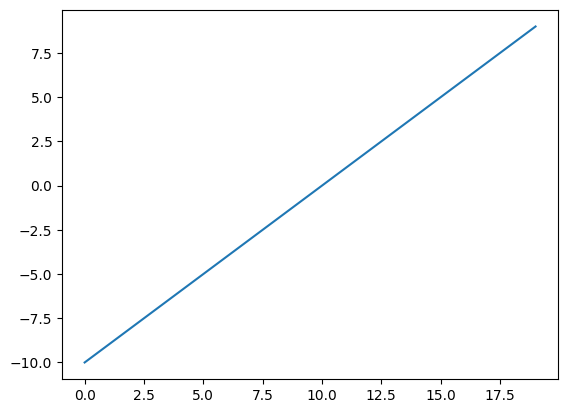

In [ ]:
plt.plot(a)

In [ ]:
# lets start by replicating sigmoid -sigmoid(x)=1/(1+exp(-x))

def sigmoid(x):
  return 1/(1 + tf.exp(-x))
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

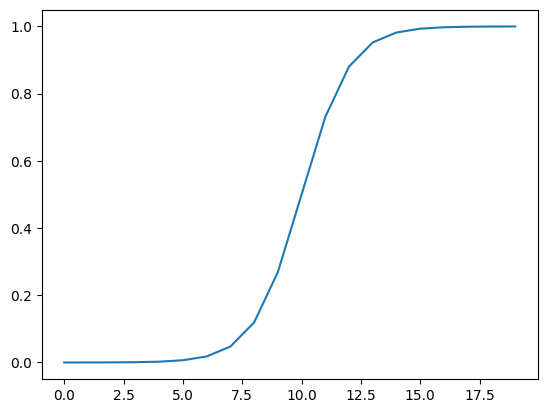

In [ ]:
plt.plot(sigmoid(a))

In [ ]:
# lets recreate the relu function

def relu(x):
  return tf.maximum(0,x)
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

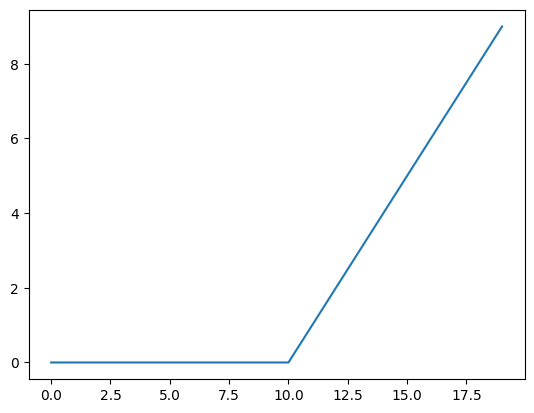

In [ ]:
plt.plot(relu(a))

In [ ]:
# lets recreate the linear function

tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
a == tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

evaluaing and improving classification

In [ ]:
len(x)

1000

In [ ]:
x, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
x_train, y_train= x[:25],y[:25]
x_test, y_test = x[25:],y[25:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((25, 2), (25,), (975, 2), (975,))

In [ ]:
tf.random.set_seed(42)

m8 =tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

m8.compile(loss="binary_crossentropy",
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

history = m8.fit(x_train, y_train, epochs=25)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6800 - loss: 0.6767
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6800 - loss: 0.6761
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6800 - loss: 0.6756
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6800 - loss: 0.6750
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6800 - loss: 0.6744
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6800 - loss: 0.6739
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6800 - loss: 0.6733
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6800 - loss: 0.6728
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6800 - loss: 0.6723
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6800 - loss: 0.6717
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6800 - loss: 0.6712
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6800 - loss: 0.6706
Epo

In [ ]:
m8.evaluate(x_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4873 - loss: 0.7208  


[0.7184275388717651, 0.4953846037387848]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


(-1.1677683182718437, 1.1360036756154805)

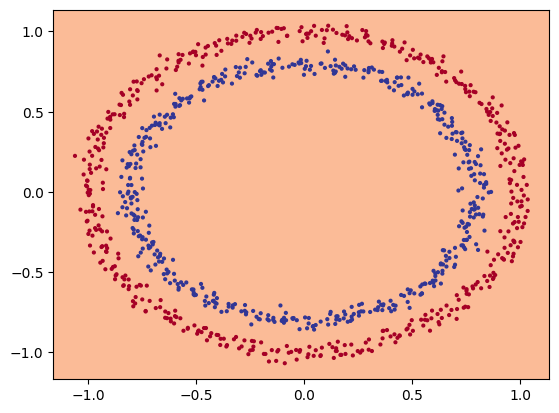

In [ ]:
# plot_decision_boundary(m8, x=x, y=y)
import numpy as np
def plot_decision_boundary(m8, x, y):
  """
  Plots the decision boundary created by a model predicting x_test
  """

    # define the axis boundaries of the plot and create a meshgrid
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))

    # create x value
x_in = np.c_[xx.ravel(), yy.ravel()]

    # make predictions
y_pred = m8.predict(x_in)

    # check for multi-class
if len(y_pred[0]) > 1:
  print("doing multiclass classification")
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  print("doing binary classification")
  y_pred = np.round(y_pred).reshape(xx.shape)

# plotting
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(x[:, 0], x[:, 1], c=y, s=4, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

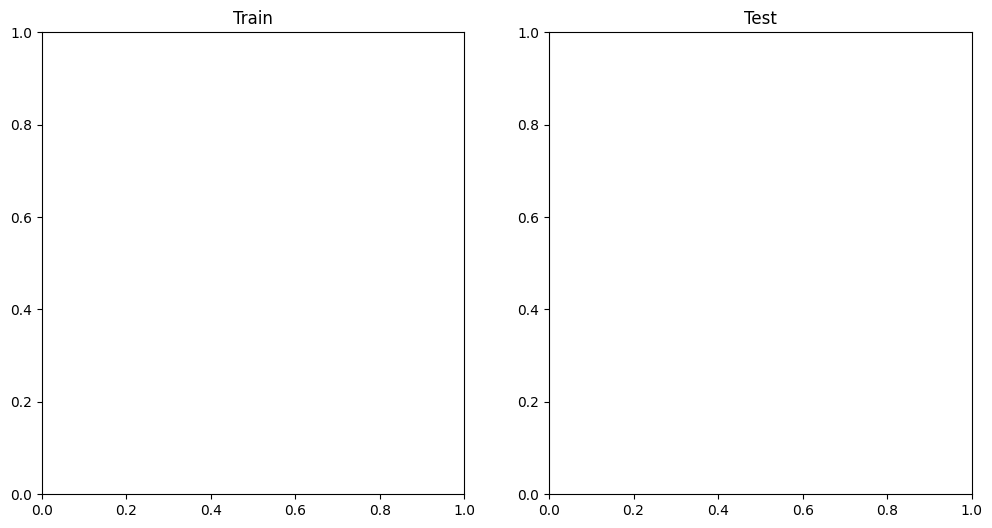

In [ ]:
# plot the figure

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m8, x_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(m8, x_test, y_test)
plt.show()

In [ ]:
history.history

{'accuracy': [0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574,
  0.6800000071525574],
 'loss': [0.6767110228538513,
  0.6761403679847717,
  0.6755733489990234,
  0.6750092506408691,
  0.6744479537010193,
  0.6738946437835693,
  0.6733429431915283,
  0.6728059649467468,
  0.672269344329834,
  0.6717265248298645,
  0.6711782217025757,
  0.6706315875053406,
  0.6700853705406189,
  0.6695298552513123,
  0.6689699292182922,
  0.6683986186981201,
  0.6678230166435242,
  0.66724693775177,
  0.6666706204414368,
  0.6660941839

In [ ]:
import pandas as pd
# convert history object into a dataframe
pd.DataFrame(history.history)

,accuracy,loss
0,0.68,0.676711
1,0.68,0.676140
2,0.68,0.675573
3,0.68,0.675009
4,0.68,0.674448
5,0.68,0.673895
6,0.68,0.673343
7,0.68,0.672806
8,0.68,0.672269
9,0.68,0.671727


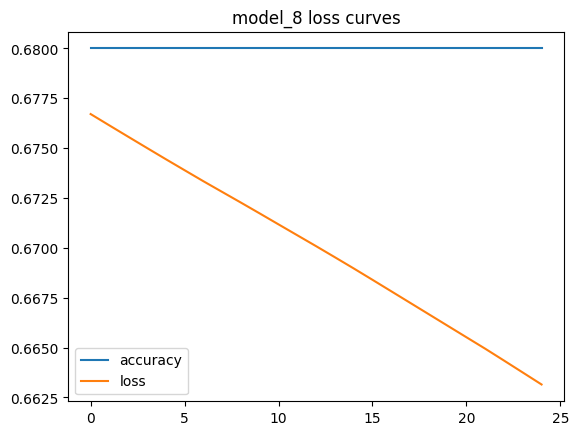

In [ ]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves");

find the best learning rate

In [ ]:
tf.random.set_seed(42)

m9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

m9.compile(loss="binary_crossentropy",
           optimizer="Adam",
           metrics=["accuracy"])

# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history9 = m9.fit(x_train,
                  y_train,
                  epochs=100,
                  callbacks=[lr_scheduler])


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6800 - loss: 0.6678 - learning_rate: 1.0000e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6800 - loss: 0.6678 - learning_rate: 1.1220e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6800 - loss: 0.6677 - learning_rate: 1.2589e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6800 - loss: 0.6677 - learning_rate: 1.4125e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6800 - loss: 0.6676 - learning_rate: 1.5849e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6800 - loss: 0.6675 - learning_rate: 1.7783e-04
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6800 - loss: 0.6674 - learning_rate: 1.9953e-04
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6800 - loss: 0.6673 - learning_rate: 2.2387e-04
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6800 - loss: 0.6672 - learning_rate: 2.511

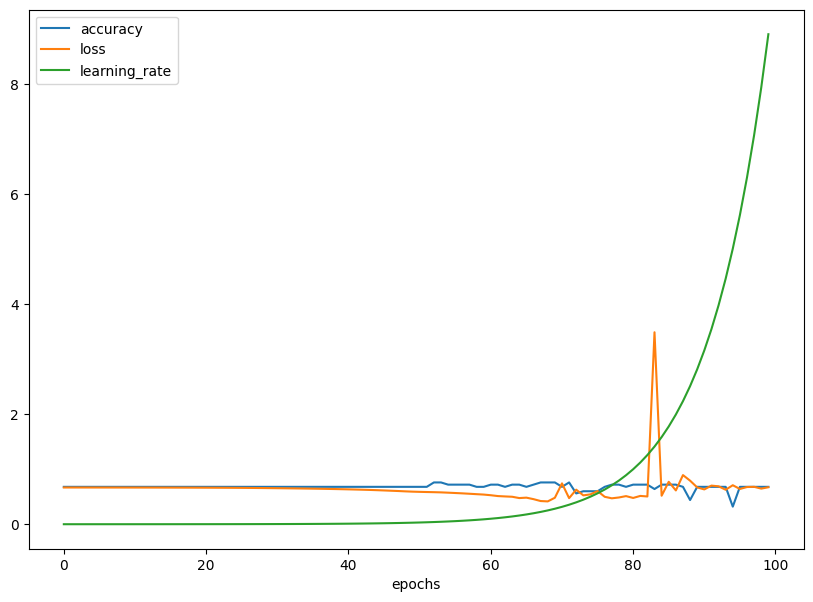

In [ ]:
# checkout the history
pd.DataFrame(history9.history).plot(figsize=(10,7), xlabel="epochs")
plt.show()

In [ ]:
# plot the learning rate versus the loss
lrs = 1e-4* (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning vs loss')

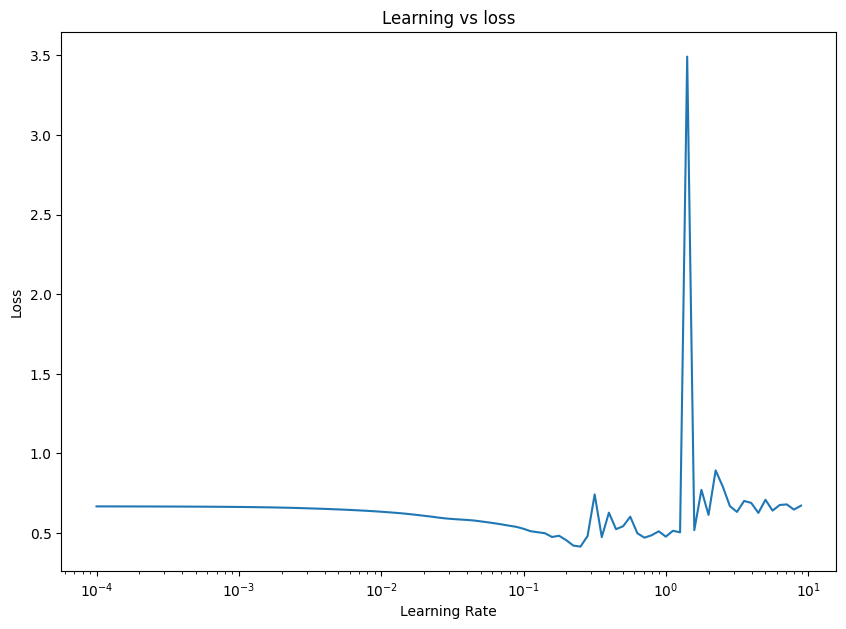

In [ ]:
lrs = 1e-4* (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning vs loss")

In [ ]:
# example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# lets try using a higher *ideal* learning rate with the same model
tf.random.set_seed(42)

m10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

m10.compile(loss="binary_crossentropy",
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
           metrics=["accuracy"])

history10 = m10.fit(x_train, y_train, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4000 - loss: 0.7242
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4800 - loss: 0.7067
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5600 - loss: 0.6935
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5600 - loss: 0.6839
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6000 - loss: 0.6762
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7200 - loss: 0.6703
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6800 - loss: 0.6650
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6800 - loss: 0.6609
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6800 - loss: 0.6569
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6800 - loss: 0.6532
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6800 - loss: 0.6492
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6800 - loss: 0.6454
Epo

In [ ]:
m10.evaluate(x_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4873 - loss: 0.7471  


[0.7413526177406311, 0.4953846037387848]

In [ ]:
m8.evaluate(x_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4873 - loss: 0.7208 


[0.7184275388717651, 0.4953846037387848]

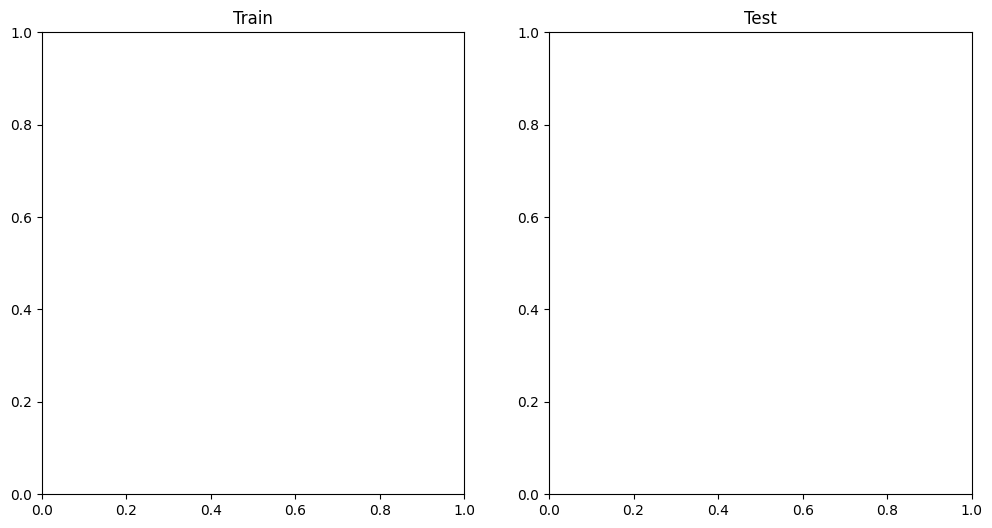

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m10, x=x_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(m10, x=x_test, y=y_test)
plt.show()

more classification evaluation models.
1.Accuracy
2.Precision
3.recall
4.F1-score
5.Confusion matrix
6.classification report

In [ ]:
# check the accuracy of our model
loss, accuracy = m10.evaluate(x_test, y_test)
print(f"model accuracy: {accuracy*100:.2f}%")
print(f"model loss: {loss}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4873 - loss: 0.7471 
model accuracy: 49.54%
model loss: 0.7413526177406311


In [ ]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = m10.predict(x_test)
# y_pred = tf.round(y_pred)
confusion_matrix(y_test, y_pred)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10]

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
y_pred[:10]

array([[0.6411381 ],
       [0.620001  ],
       [0.6781641 ],
       [0.6680893 ],
       [0.6871205 ],
       [0.65976703],
       [0.6212387 ],
       [0.6211186 ],
       [0.6769524 ],
       [0.6490654 ]], dtype=float32)

In [ ]:
# convert prediction probabilities to binary format and view the first 10
tf.round(y_pred[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# create a confusion matrix
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[  0, 492],
       [  0, 483]])

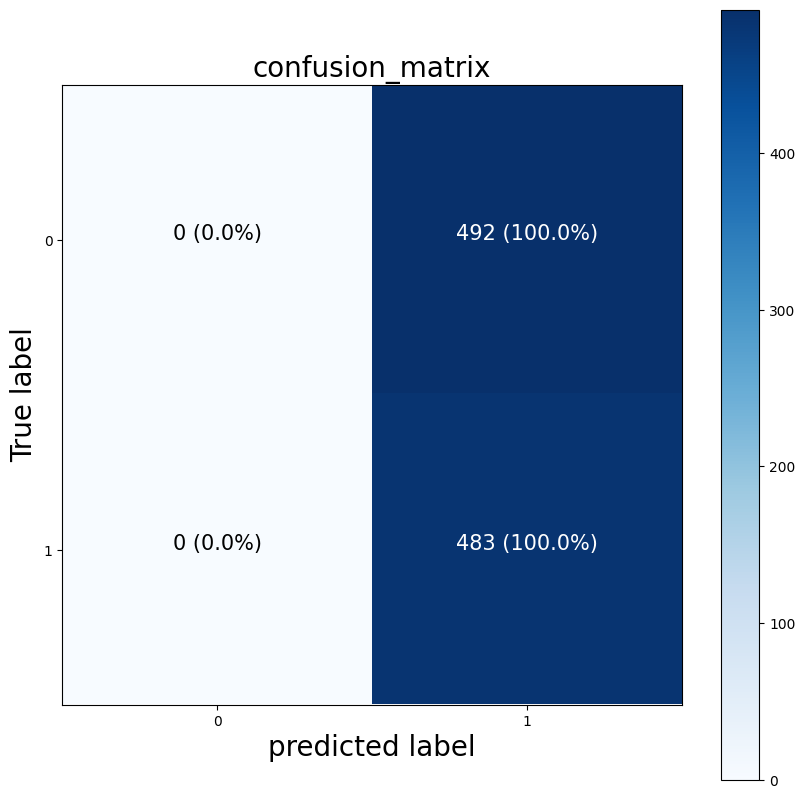

In [ ]:
# make confusion matrix prettier
import itertools

figsize = (10,10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes

ax.set(title = "confusion_matrix",
       xlabel = "predicted label",
       ylabel = "True label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max()+ cm.min()) / 2

# plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i,j] > threshold else "black",
           size = 15)